In [1]:
import numpy as np
import xarray as xr
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import itertools as it

sns.set_style('whitegrid', {'xtick.major.size': 5,
                            'xtick.labelsize': 'large',
                            'ytick.major.size': 5,
                            'ytick.labelsize': 'large',
                            'axes.edgecolor': 'k',
                            'font.weight': 'bold',
                            'axes.labelsize': 'large'})
sns.set_palette('colorblind')

In [2]:
prefix = 'boyle_Z_'
raw_data = xr.open_dataset('../data/{}raw_data.nc'.format(prefix))['RAW']
# For some reason the data-type isn't preserved and loads back as '|S8'
raw_data.coords['data'] = raw_data.coords['data'].astype('<U8')
raw_data.coords['mn'] = raw_data.coords['mn'].astype('<U8')

thermo = xr.open_dataset('../data/{}thermo_data.nc'.format(prefix))['THERMO']
# For some reason the data-type isn't preserved and loads back as '|S8'
thermo.coords['thermo'] = thermo.coords['thermo'].astype('<U8')
thermo.coords['mn'] = thermo.coords['mn'].astype('<U8')
r = raw_data.coords['r']
dk = np.pi / r[-1].item()
n_points = r.shape[0]
k = np.linspace(dk, n_points*dk - dk, n_points)

In [3]:
raw_data.coords['Z']

<xarray.DataArray 'Z' (Z: 5)>
array([   1000.,    5000.,   10000.,   50000.,  100000.])
Coordinates:
  * Z        (Z) float64 1e+03 5e+03 1e+04 5e+04 1e+05

//anaconda/envs/pyoz/lib/python3.5/site-packages/matplotlib/cbook.py:137: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


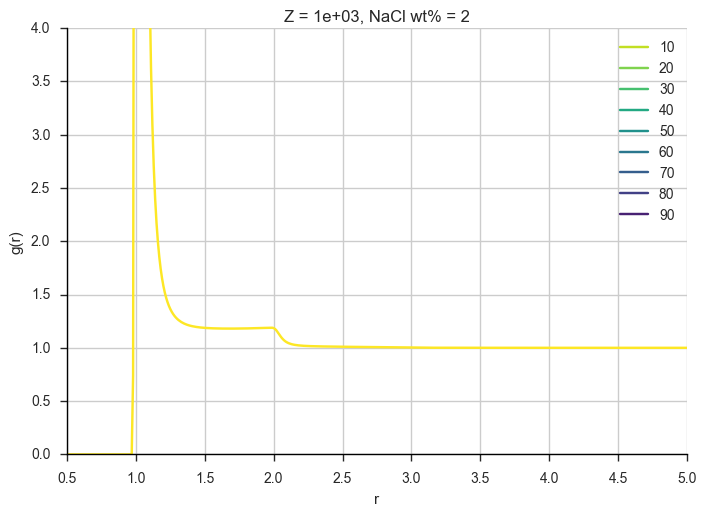

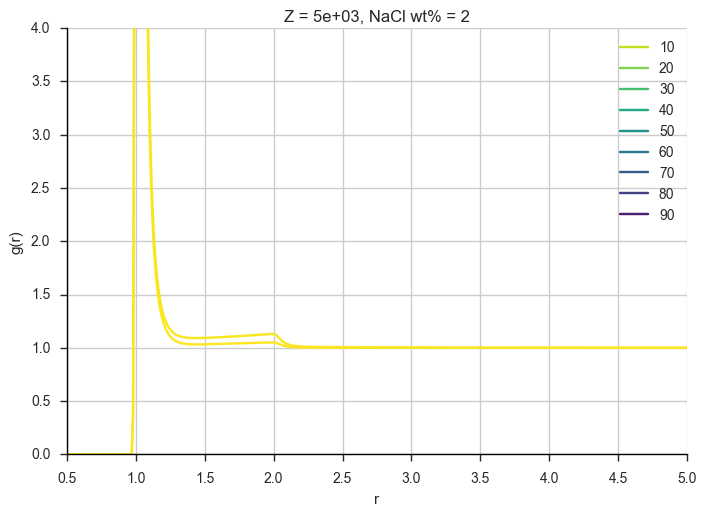

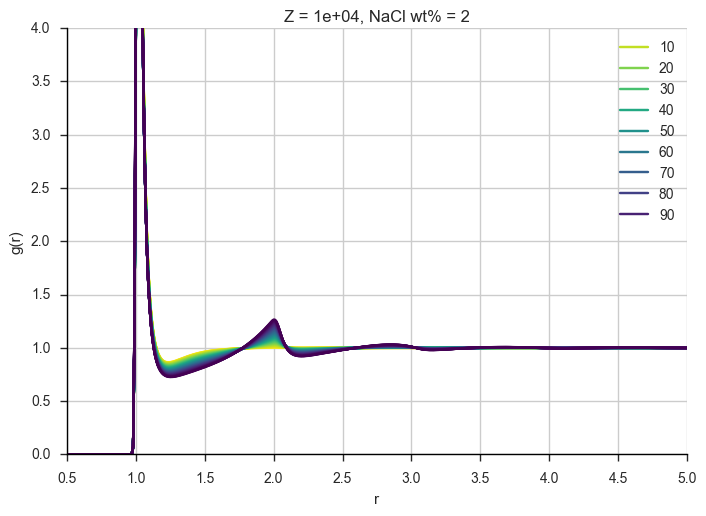

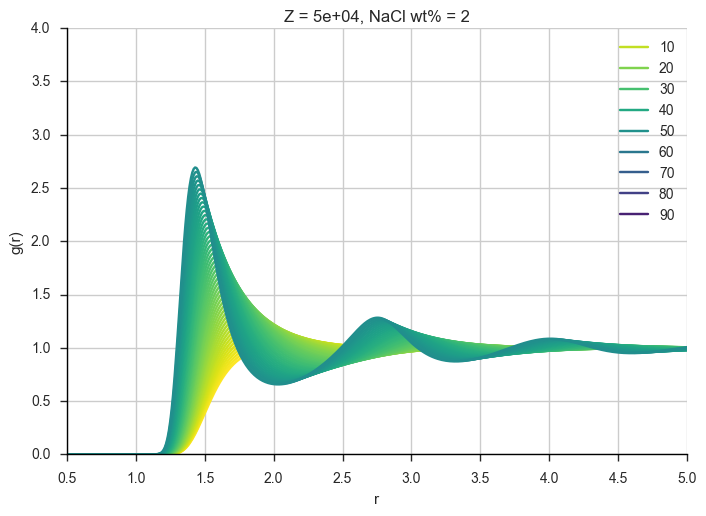

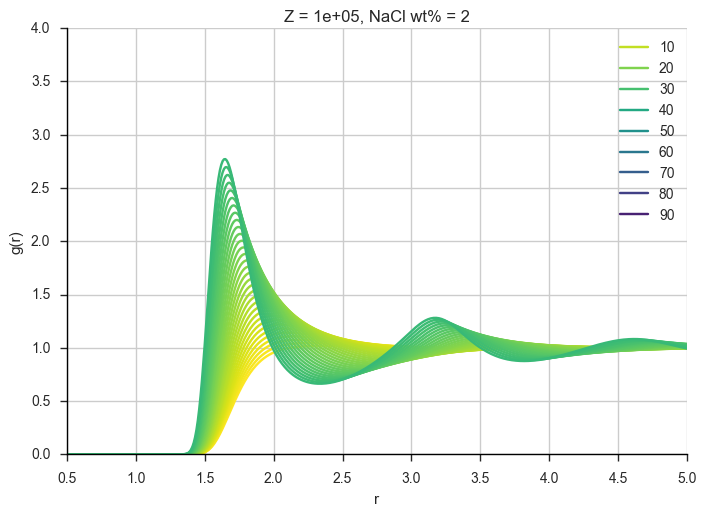

In [8]:
# fig, ax = plt.subplots()
sio2_range = raw_data.coords['SiO2']
Z_range = raw_data.coords['Z']
eps_range = raw_data.coords['epsilon']
n_lines = len(sio2_range)


for i, Z in enumerate(Z_range):
    fig, ax = plt.subplots()
    ax.set_color_cycle([plt.cm.viridis(i) for i in np.linspace(1, 0, n_lines)])
    for n, sio2 in enumerate(sio2_range):
        foo = raw_data.sel(mn='50-18', data='g_r', SiO2=sio2, Z=Z.item())
        foo.plot(ax=ax, label=sio2.item() if (n+1) % 10 == 0 else '_nolegend_')
    plt.legend()
    plt.xlim(0.5, 5)
    plt.ylim(0, 4)
    plt.ylabel('g(r)')
    plt.title('Z = {:.0e}, NaCl wt% = 2'.format(Z.item()))
    sns.despine()
    fig.savefig('eps_{:.3f}_Z_{:.0e}.pdf'.format(eps.item(), Z.item()), bbox_inches='tight')

//anaconda/envs/pyoz/lib/python3.5/site-packages/matplotlib/cbook.py:137: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
//anaconda/envs/pyoz/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


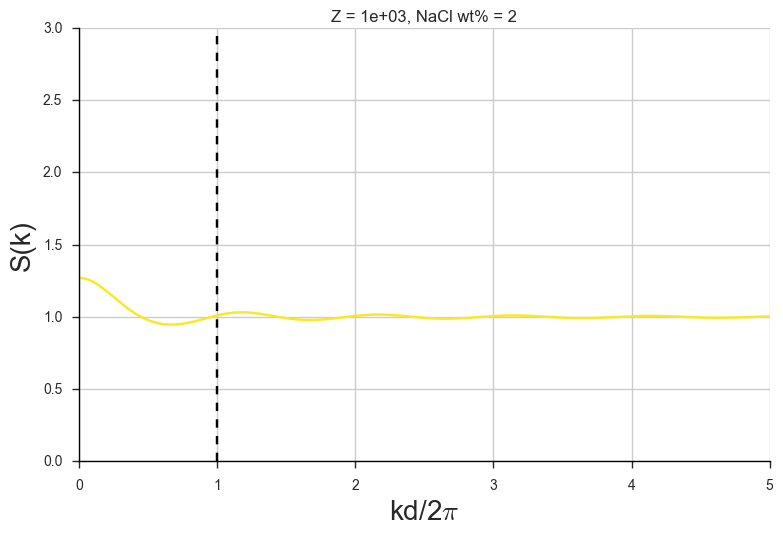

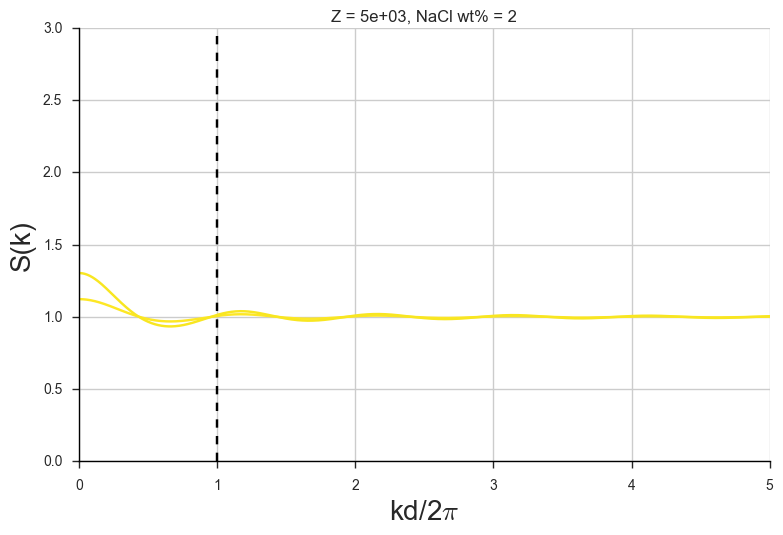

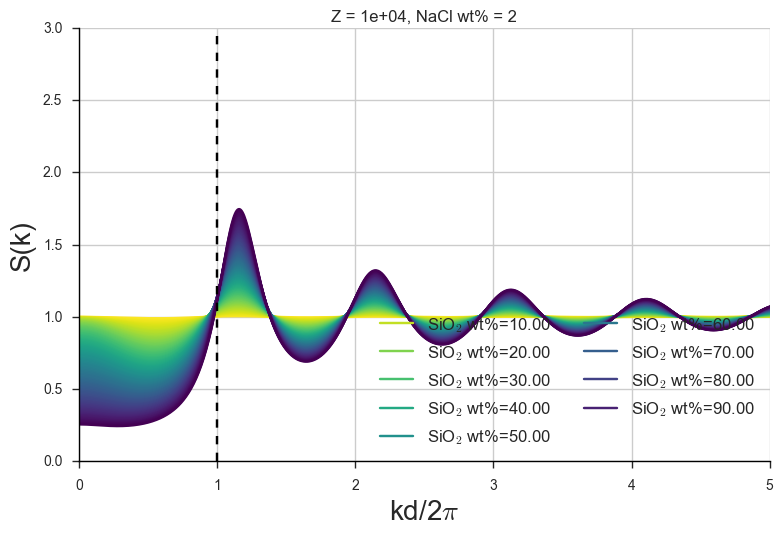

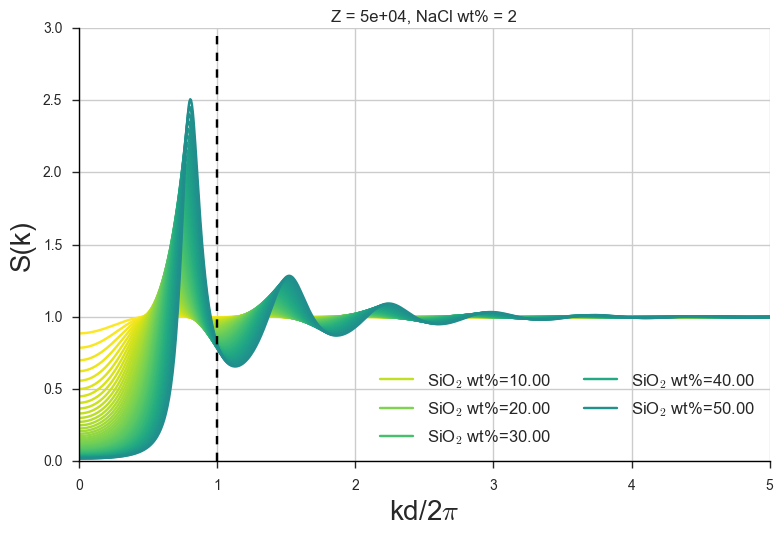

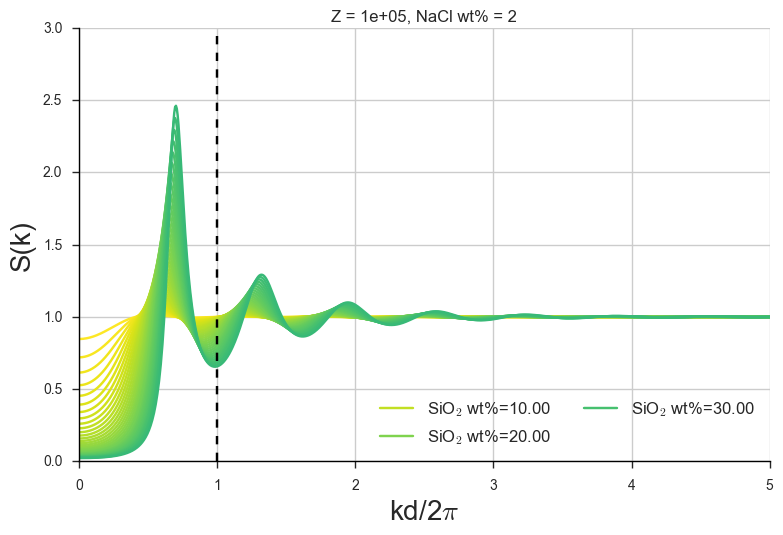

In [11]:
nacls = [x.item() for x in raw_data.coords['NaCl']]
sio2s = [x.item() for x in raw_data.coords['SiO2']]
colors = dict(zip(sio2s, sns.cubehelix_palette(n_colors=len(sio2s), start=.5, rot=-.75)))

for Z in raw_data.coords['Z']:
    f, ax = plt.subplots()
    # labeled = set()
    ax.set_color_cycle([plt.cm.viridis(i) for i in np.linspace(1, 0, n_lines)])
    for sio2 in raw_data.coords['SiO2']:
        s_k = raw_data.sel(SiO2=sio2, NaCl=2, data='S_k', mn='50-18', Z=Z.item(), epsilon=1.829)
        if np.isnan(s_k[10]):
            continue
        if sio2.item() % 10 == 0:
            lab = r'SiO$_2$ wt%={:.2f}'.format(sio2.item())
        else:
            lab = ''

        ax.plot(k/(2*np.pi), s_k, 
#                 color=colors[sio2.item()],
                label=lab)
    ax.set_xlim(0, 5)
    ax.set_ylim(0, 3)
    ax.legend(loc='lower right', fontsize=12, ncol=2)
    ax.axvline(1, ls='--', color='k')

    ax.set_xlabel(r'kd/2$\pi$', fontsize=20)
    ax.set_ylabel('S(k)', fontsize=20)
#     ax.set_title('epsilon = {:.5f}, NaCl wt% = 1'.format(eps.item()))
    ax.set_title('Z = {:.0e}, NaCl wt% = 2'.format(Z.item()))

    plt.tight_layout()
    sns.despine()
    f.savefig('eps_{:.3f}_Z_{:.0e}_sk.pdf'.format(eps.item(), Z.item()), bbox_inches='tight')